In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import norm
import matplotlib.pyplot as plt
import os 
os.chdir("C:\\Users\\jaspr\\OneDrive\\Documents\\Conestoga\\Predictive Analytics\\Semester II\\STAT8051\\Assignment 1")


# Question 2

In [2]:
# Question 2
mean = 4.5
SD = 0.82

# 1. What is the probability that the web site has fewer than 5 million visitors in asingle day?
prob_lt_5million = norm.cdf(5, mean, SD)
print(f"The probability of having < 5 million visitors in a single day is {prob_lt_5million :.4f}")

# 2.What is the probability that the web site has 3 million or more visitors in a single day?
prob_ge_3million = 1-norm.cdf(3, mean, SD)
print(f"The probability of having visitors greater than or equal to 3 million in a single day is {prob_ge_3million :.4f}")

# 3. What is the probability that the web site has between 3 million and 4 million visitors in a single day?
prob_btw_3million_4million = norm.cdf(4, mean, SD)- norm.cdf(3, mean, SD)
print(f"The probability of having visitors between 3 million and 4 million in a single day is {prob_btw_3million_4million :.4f}")

# 4. Assume that 85% of the time, the Smiley’s People web servers can handle the daily web traffic volume without purchasing additional server capacity. What is the amount of web traffic that will require Smiley’s People to purchase additional server capacity?
traffic_amount = norm.ppf(0.85,mean, SD)
print(f"At 85th percentile, the value is {traffic_amount :.2f} million. Smiley's People will require additional server capacity if traffic is more {traffic_amount :.2f} million visitors.")


The probability of having < 5 million visitors in a single day is 0.7290
The probability of having visitors greater than or equal to 3 million in a single day is 0.9663
The probability of having visitors between 3 million and 4 million in a single day is 0.2373
At 85th percentile, the value is 5.35 million. Smiley's People will require additional server capacity if traffic is more 5.35 million visitors.


# Quesion 3 - Big blue Kmeans clustering

In [3]:
# Load your data
df = pd.read_excel("BigBlue.xlsx")

In [4]:
df.head()

,EmployeeID,UsageRate,Recognition,Leader
0,1,0.000000,0,0
1,2,0.632785,0,0
2,3,0.003499,0,0
3,4,0.000234,0,0
4,5,0.000438,0,0


In [5]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(df)

In [6]:
df1 = pd.DataFrame(X_std)
df1.columns = ['EmployeeID','UsageRate', 'Recognition', 'Leader']
df1.head()

,EmployeeID,UsageRate,Recognition,Leader
0,-1.715938,-0.987798,-0.434937,-0.186591
1,-1.683562,1.020380,-0.434937,-0.186591
2,-1.651186,-0.976692,-0.434937,-0.186591
3,-1.618810,-0.987056,-0.434937,-0.186591
4,-1.586434,-0.986409,-0.434937,-0.186591


In [7]:
df1.to_excel('normalized_data.xlsx')

C:\Users\jaspr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


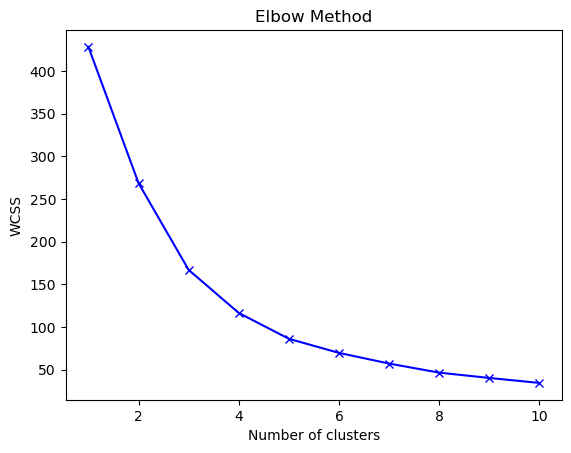

In [8]:
# Checking optimal number of clusters by elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [10]:
#df2 = df1[['UsageRate', 'Recognition', 'Leader']]
# df2=df1

In [11]:
#apply kmeans on the actual data with k=4
kmeans_app = KMeans(n_clusters= 4,init ='k-means++', max_iter=300, n_init=10,random_state=0 )
     
clust = kmeans_app.fit_predict(df)
df['cluster']=clust
#Getting unique cluster value
u_clust = np.unique(clust)
u_clust

array([0, 1, 2, 3])

In [12]:
df.head()

,EmployeeID,UsageRate,Recognition,Leader,cluster
0,1,0.000000,0,0,0
1,2,0.632785,0,0,0
2,3,0.003499,0,0,0
3,4,0.000234,0,0,0
4,5,0.000438,0,0,0


In [13]:
# calculate each cluster summary
cluster_summary = pd.DataFrame(df.groupby('cluster').agg({'UsageRate': ['mean', 'max', 'min','count'],
                                           'Recognition': ['mean', 'max', 'min','count'],
                                           'Leader': ['mean', 'max', 'min','count']
                                          }))

# Display the cluster summary
cluster_summary

UsageRate                           Recognition                \
             mean       max       min count        mean max min count   
cluster                                                                 
0        0.221641  0.939579  0.000000    27    0.111111   1   0    27   
1        0.397284  0.911853  0.002379    27    0.629630   4   0    27   
2        0.207219  0.924250  0.000273    27    0.148148   2   0    27   
3        0.423034  0.993534  0.005977    26    0.615385   3   0    26   

           Leader                
             mean max min count  
cluster                          
0        0.000000   0   0    27  
1        0.037037   1   0    27  
2        0.000000   0   0    27  
3        0.192308   2   0    26

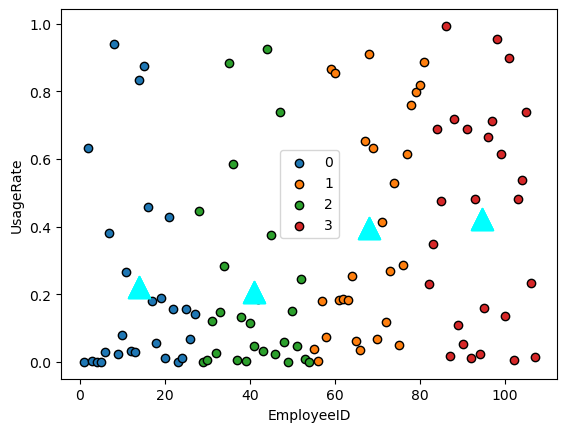

In [14]:
#plotting the results with k=4 cluster  with EMployee ID and UsageRate:

for i in u_clust:
    plt.scatter(df.loc[clust == i, df.columns[0]], df.loc[clust == i, df.columns[1]], label=i,edgecolors='k')
    plt.scatter(kmeans_app.cluster_centers_[:, 0], kmeans_app.cluster_centers_[:, 1], s=250, marker='^', c="cyan")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend()
plt.show()

In [15]:
df1.to_excel('normalized_data.xlsx')

In [16]:
cluster_summary.to_excel('cluster_summary.xlsx')